In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from hat_support import *
from hat_solution import *

In [2]:
# Parameters
β = 0.96        # Discount Rate
σ = 3           # EIS
α = 0.36        # Output Elasticity of Capital
δ = 0.08        # Depreciation Rate
φ = -3          # Borrowing Constraint
σ_ε = 0.25      # Standard deviation of logit shock
N = 5           # Number of countries

# Set up grids
# ρ = 0.6 and  σ_z = 0.3
log_zgrid, P, estar = tauchen(5, 0.2, 0.3919)
zgrid = np.exp(log_zgrid)
agrid = np.linspace(φ, 8, 100) 

# Prices
p = 1.5 * np.ones(N)
p[0] = 1

# Create Model Instance
m = HATmodel(β, σ, α, φ, δ, σ_ε, N, P)


## First iteration of the Coleman operator

In [3]:
gc0_vec = np.linspace(0.1, 3, agrid.shape[0])
gc0 = np.repeat(np.repeat(gc0_vec[:,np.newaxis], zgrid.shape[0], axis=1)[:,:,np.newaxis], N, axis=2) 
v0 = (-1)*np.ones((agrid.shape[0], zgrid.shape[0], N))/(1-β)
x0 = np.concatenate([gc0, v0])

x1 = m.coleman(agrid, zgrid, x0, 1.029, 1, p)
gc1 = x1[0:agrid.shape[0], :, :]
v1 = x1[agrid.shape[0]:, :, :]

print(gc1[:, :, 0])

[[0.13468852 0.19088029 0.29326549 0.47981824 0.81972996]
 [0.16063432 0.21682608 0.31921128 0.50576404 0.84567576]
 [0.18658011 0.24277188 0.34515708 0.53170983 0.87162156]
 [0.21252591 0.26871768 0.37110288 0.55765563 0.89756735]
 [0.23847171 0.29466347 0.39704867 0.58360142 0.92351315]
 [0.2644175  0.32060927 0.42299447 0.60954722 0.94945894]
 [0.2903633  0.34655507 0.44894026 0.63549302 0.97540474]
 [0.31630909 0.37250086 0.47488606 0.66143881 1.00135054]
 [0.34225489 0.39844666 0.50083186 0.68738461 1.02729633]
 [0.36820069 0.42439245 0.52677765 0.71333041 1.05324213]
 [0.39414648 0.45033825 0.55272345 0.7392762  1.07918793]
 [0.42009228 0.47628405 0.57866924 0.765222   1.10513372]
 [0.44603807 0.50222984 0.60461504 0.79116779 1.13107952]
 [0.47198387 0.52817564 0.63056084 0.81711359 1.15702531]
 [0.49792967 0.55412143 0.65650663 0.84305939 1.18297111]
 [0.52387546 0.58006723 0.68245243 0.86900518 1.20891691]
 [0.54982126 0.60601303 0.70839823 0.89495098 1.2348627 ]
 [0.57576705 0

## Solve for policies and distribution

In [4]:
eqm = m.find_equilibrium(agrid, zgrid, 1.029, 1, p)

In [5]:
print(eqm.ga[:,:,0])

[[-3.00000000e+00 -3.00000000e+00 -2.80113015e+00 -2.13303211e+00
  -7.50935920e-01]
 [-3.00000000e+00 -2.97251847e+00 -2.71646409e+00 -2.02987655e+00
  -6.42503029e-01]
 [-3.00000000e+00 -2.91502026e+00 -2.62718854e+00 -1.92593890e+00
  -5.33918297e-01]
 [-2.95571596e+00 -2.84875542e+00 -2.53431994e+00 -1.82132837e+00
  -4.25193746e-01]
 [-2.90155534e+00 -2.77481489e+00 -2.43810170e+00 -1.71615411e+00
  -3.16339506e-01]
 [-2.83610601e+00 -2.69067362e+00 -2.33993736e+00 -1.61049130e+00
  -2.07363704e-01]
 [-2.76532764e+00 -2.60281606e+00 -2.24004009e+00 -1.50439926e+00
  -9.82764772e-02]
 [-2.68415500e+00 -2.51118891e+00 -2.13884778e+00 -1.39792940e+00
   1.09141598e-02]
 [-2.59861337e+00 -2.41631186e+00 -2.03664108e+00 -1.29112275e+00
   1.20201602e-01]
 [-2.50910561e+00 -2.31946345e+00 -1.93353108e+00 -1.18401740e+00
   2.29579379e-01]
 [-2.41609435e+00 -2.22068157e+00 -1.82963649e+00 -1.07664393e+00
   3.39041441e-01]
 [-2.32092718e+00 -2.12027512e+00 -1.72509026e+00 -9.69028237e-01

In [6]:
print(eqm.π[:,:,0])

[[1.         0.99996753 0.93571216 0.76363964 0.63925015]
 [1.         0.99770731 0.9054055  0.75070867 0.6336727 ]
 [0.99998834 0.98687683 0.88014811 0.73875259 0.62830547]
 [0.99875167 0.9734657  0.85786495 0.72757495 0.62313995]
 [0.99479131 0.94919174 0.83535367 0.71711677 0.61815569]
 [0.98484787 0.92441924 0.81426864 0.70741175 0.61332526]
 [0.96494196 0.89679514 0.79732855 0.69836281 0.60865186]
 [0.94402255 0.87442423 0.7819355  0.68984785 0.60413412]
 [0.91858852 0.85202318 0.76782114 0.68185993 0.59976266]
 [0.89499436 0.83136583 0.75480804 0.67444757 0.59552201]
 [0.87248337 0.81324438 0.74263337 0.66742729 0.5914049 ]
 [0.85133996 0.7958975  0.73123009 0.66072727 0.5874016 ]
 [0.83208456 0.78128026 0.72069388 0.65432578 0.58350582]
 [0.81289559 0.76760736 0.71091728 0.6481947  0.5797133 ]
 [0.79740251 0.7546906  0.70176899 0.64230079 0.57601637]
 [0.78280327 0.74262632 0.69340283 0.63663763 0.57239564]
 [0.76894009 0.73149005 0.68547046 0.63119764 0.5688603 ]
 [0.75597121 0

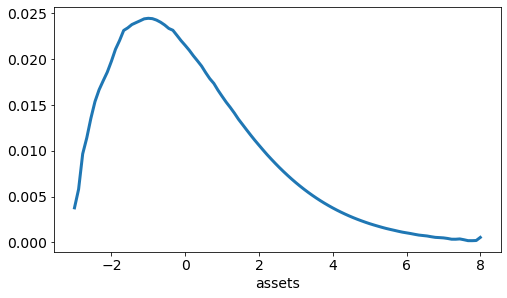

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(8,4.5))
ax.plot(agrid, eqm.λ_a, linewidth=3)
plt.xlabel('assets')
ax.xaxis.get_label().set_fontsize(14)
ax.yaxis.get_label().set_fontsize(14)
ax.tick_params(axis='both', which='major', labelsize=14)